In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
warnings.filterwarnings('ignore')
np.random.seed(42)

Kmeans

In [2]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [3]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

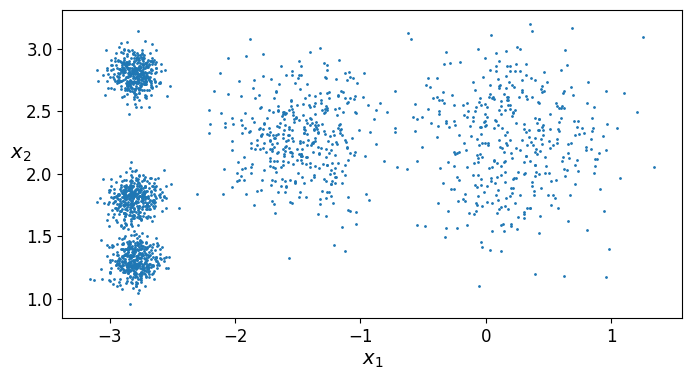

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

决策边界

In [5]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

fit_predict(X)与kmeans.labels得到的预测结果是一致的

In [6]:
y_pred

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [7]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [8]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [9]:
X_new= np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

In [10]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:,0], centroids[:,1],
                 marker='o', s=30, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:,0], centroids[:,1],
                 marker='x', s=50, linewidths=50, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):

    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                      np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")

    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

    plot_data(X)

    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')

    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

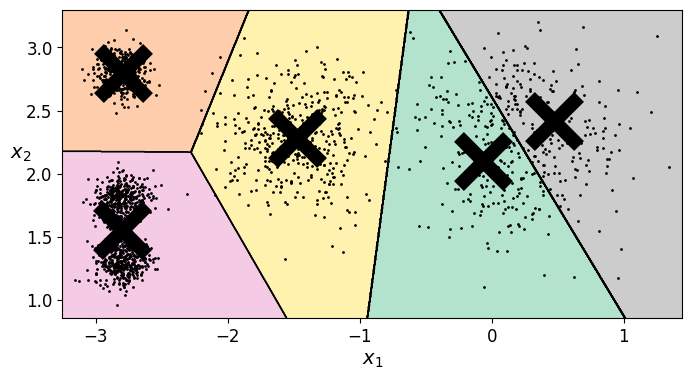

In [11]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)
plt.show()

算法流程

In [12]:
kmeans_iter1 = KMeans(n_clusters = 5, init = 'random', n_init = 1, max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters = 5, init = 'random', n_init = 1, max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters = 5, init = 'random', n_init = 1, max_iter=8, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=8, n_clusters=5, n_init=1, random_state=1)

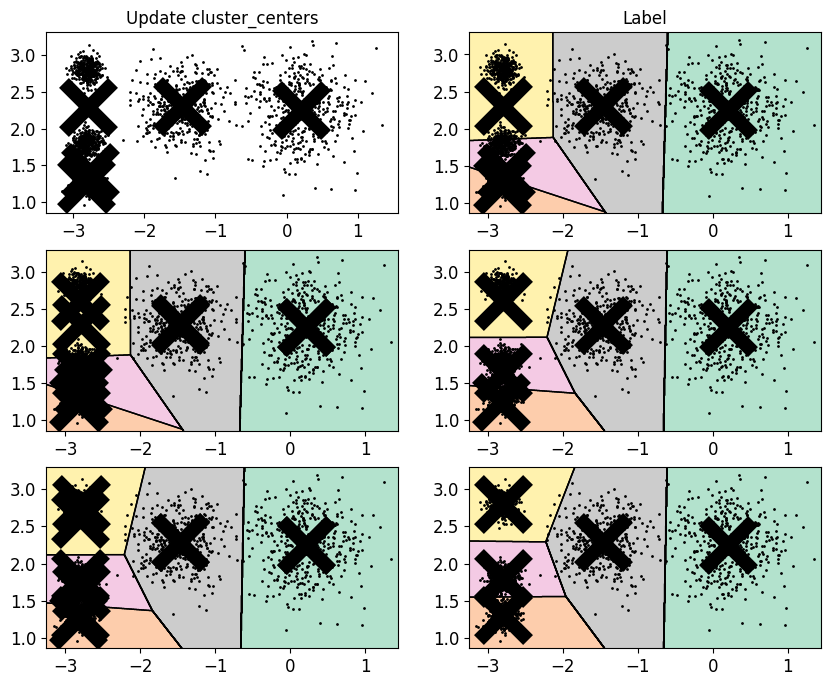

In [13]:
plt.figure(figsize=(10, 8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Update cluster_centers')

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title('Label')

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)


In [14]:
def plot_cluster_comparison(c1, c2, X):
    c1.fit(X)
    c2.fit(X)
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plot_decision_boundaries(c1, X)
    plt.subplot(122)
    plot_decision_boundaries(c2, X)
    plt.show()

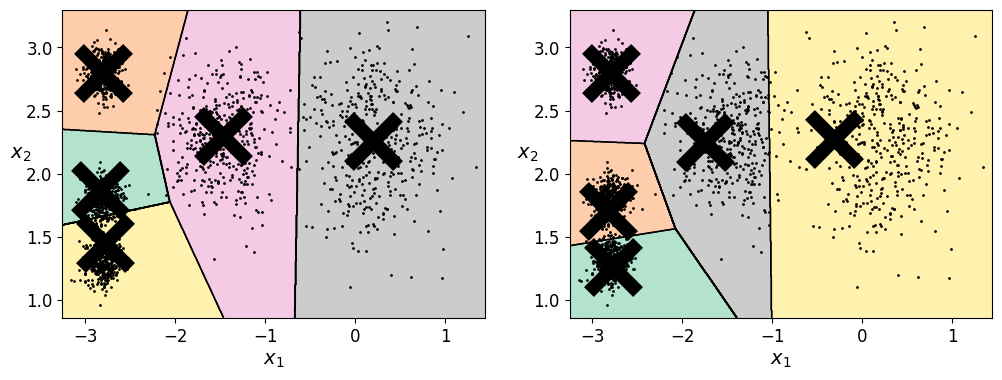

In [15]:
c1 = KMeans(n_clusters = 5, init = 'random', n_init = 1, max_iter=1, random_state=11)
c2 = KMeans(n_clusters = 5, init = 'random', n_init = 1, max_iter=1, random_state=19)
plot_cluster_comparison(c1, c2, X)

#### 评估方法
- Inertia指标：每个样本与其质心的距离

In [16]:
kmeans.inertia_

224.0743312251573

In [17]:
X_dist = kmeans.transform(X)

In [18]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [19]:
X_dist[np.arange(len(X_dist)), kmeans.labels_]

array([0.23085922, 0.26810747, 1.33653447, ..., 0.06769209, 0.23020951,
       0.43658314])

In [20]:
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2)

np.float64(224.07433122515704)

In [21]:
kmeans.score(X)

-224.07433122515727

In [22]:
c1.inertia_

222.32302601800427

In [23]:
c2.inertia_

348.0561818435236

找到最佳簇数

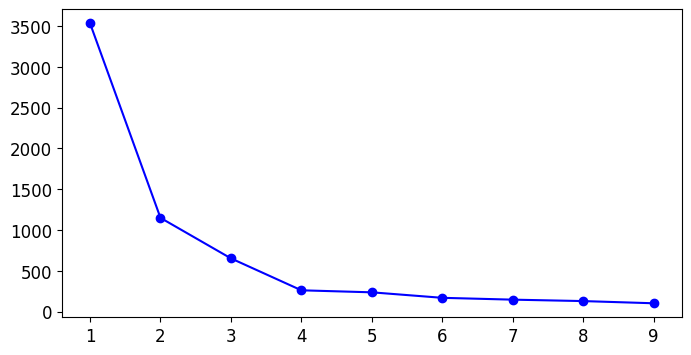

In [24]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, 'bo-')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.6267891051050735)

In [26]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
silhouette_scores

[np.float64(0.5966442557582528),
 np.float64(0.5723900247411775),
 np.float64(0.688531617595759),
 np.float64(0.618858196925946),
 np.float64(0.6027611425418072),
 np.float64(0.5655393882558312),
 np.float64(0.5911144503137686),
 np.float64(0.5661946395774896)]

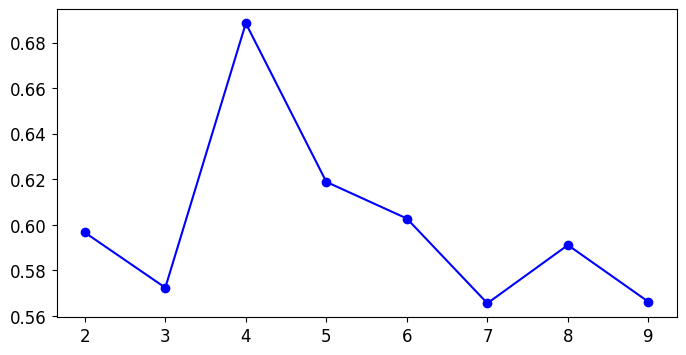

In [27]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.show()

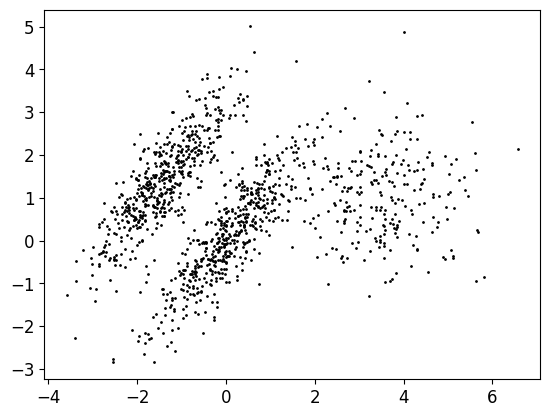

In [28]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_data(X)

In [29]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'kmeans_bad_inertia_ = 2242.4186929658495')

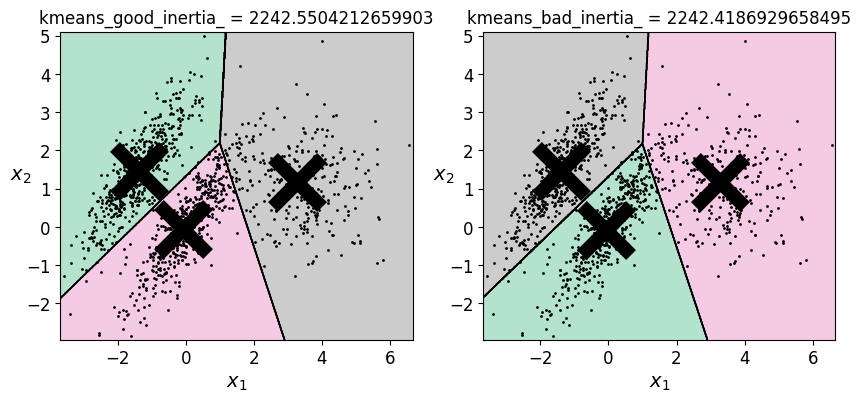

In [30]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("kmeans_good_inertia_ = {}".format(kmeans_good.inertia_))
plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X)
plt.title("kmeans_bad_inertia_ = {}".format(kmeans_bad.inertia_))

图像分割小例子

In [31]:
from matplotlib.image import imread
image = imread("ladybug.png")
image.shape

(533, 800, 3)

In [32]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [33]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
kmeans.cluster_centers_

array([[0.02200824, 0.10830405, 0.00568248],
       [0.9830659 , 0.9326744 , 0.02553986],
       [0.21326055, 0.38075975, 0.0551754 ],
       [0.6082834 , 0.6286244 , 0.38580465],
       [0.36679193, 0.519526  , 0.15321358],
       [0.09567395, 0.24869448, 0.01605384],
       [0.76519364, 0.19927867, 0.04392381],
       [0.8761068 , 0.7174295 , 0.03685704]], dtype=float32)

In [34]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(533, 800, 3)

In [35]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_cluster in n_colors:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

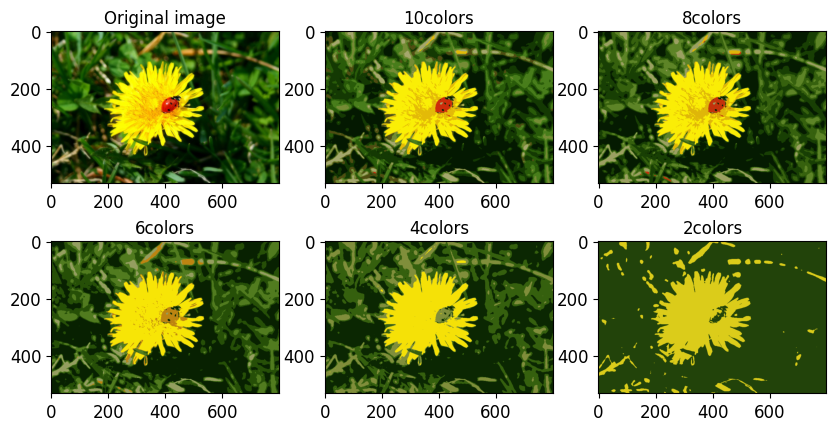

In [36]:
plt.figure(figsize=(10, 5))
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')
for index, n_cluster in enumerate(n_colors):
    plt.subplot(232 + index)
    plt.imshow(segmented_imgs[index])
    plt.title('{}colors'.format(n_cluster))

#### 半监督学习

首先，让我们将训练集聚类为50个集群，然后对于每个聚类，让我们找到最靠近质心的图像。我们将这些图像称为代表性图像：

In [37]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression
n_labeled = 50
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train[:n_labeled], y_train[:n_labeled])
logistic_regression.score(X_test, y_test)

0.8266666666666667

In [39]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [40]:
representative_digits_index = np.argmin(X_digits_dist, axis=0)
representative_digits_index.shape

(50,)

In [41]:
X_representative_digits = X_train[representative_digits_index]

现在让我们绘制这些代表性图像并手动标记它们：

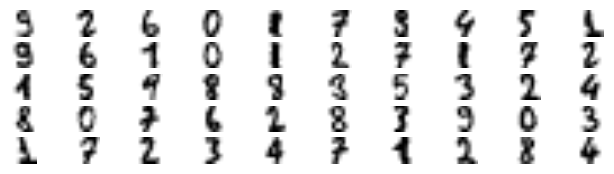

In [42]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap='binary', interpolation='bilinear')
    plt.axis('off')
plt.show()

In [43]:
y_representative_digits = np.array([
    9, 2, 6, 0, 1, 7, 3, 4, 5, 1,
    9, 6, 1, 0, 1, 2, 7, 1, 7, 2,
    1, 5, 9, 8, 8, 3, 5, 3, 2, 4,
    8, 0, 7, 6, 2, 8, 3, 9, 0, 3,
    1, 7, 2, 3, 4, 7, 1, 2, 8, 4
])

现在我们有一个只有50个标记实例的数据集，它们中的每一个都是其集群的代表性图像，而不是完全随机的实例。让我们看看性能是否更好：

In [44]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_representative_digits, y_representative_digits)
logistic_regression.score(X_test, y_test)

0.9288888888888889

我们也可以更进一步：如果我们将标签传播到同一群集中的其他实例，该怎么办？

In [45]:
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train_propagated)
logistic_regression.score(X_test, y_test)

0.94

In [46]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]  # 选择属于当前簇的所有样本
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)  # 排序找到前20个
    above_cutoff = (X_cluster_dist > cutoff_distance)  # False True结果
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_partially_propagated, y_train_partially_propagated)
logistic_regression.score(X_test, y_test)

0.9288888888888889

DBSCAN

In [47]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

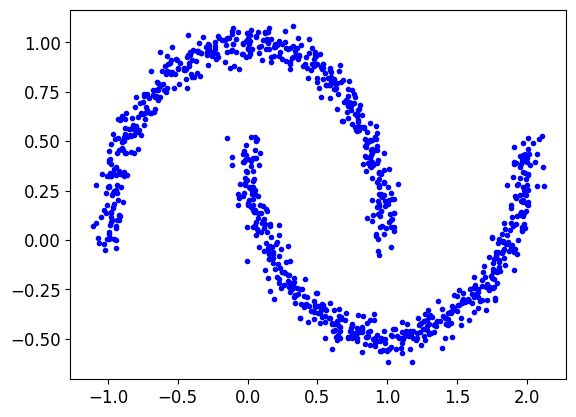

In [48]:
plt.plot(X[:, 0], X[:, 1], 'b.')

In [49]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [50]:
dbscan.labels_

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

In [51]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [52]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [53]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap='Paired')
    plt.scatter(cores[:, 0], cores[:, 1], marker='x', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 1], anomalies[:, 1], c='r', marker='x', s=100)
    plt.scatter(non_cores[:, 0], non_cores[:,1], c=dbscan.labels_[non_core_mask], marker='.')

    if show_xlabels:
        plt.xlabel('$x_1$', fontsize=10)
    else:
        plt.tick_params(labelbottom='off')

    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=10, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title('eps = {:.2f}, min_samples = {}'.format(dbscan.eps, dbscan.min_samples), fontsize = 10)

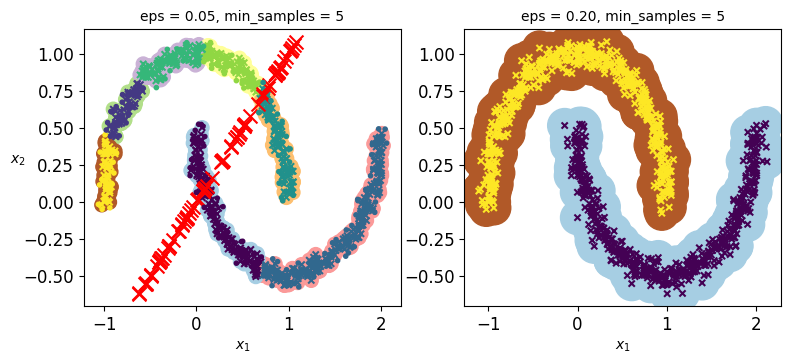

In [54]:
plt.figure(figsize=(9, 3.6))
plt.subplot(121)
plot_dbscan(dbscan=dbscan, X=X, size=100)
plt.subplot(122)
plot_dbscan(dbscan=dbscan2, X=X, size=600, show_ylabels=False)
plt.show()